# INSTRUCTIONS AND QUESTIONS

Use our notebooks to create the following:

1. Histogram plot (fruits of each kind, 2 pts) .

2. Scatter plot (2 pts).

3. Implement kNN, Logistic Regression (L1, L2 regularization) and LinearSVM (L1, L2 regularization) and in table form list the test accuracy, optimal hyperparameter, top predictors. (11 pts)

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [140]:
df = pd.read_table('fruit_data_with_colors.txt')
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


# Histograms and Scatter Plots

In [141]:

def pair_plot(fruit_name):
    df_fruit = df[df['fruit_name']==fruit_name][['mass', 'width', 'height', 'color_score']]
    sns.pairplot(df_fruit)
    plt.figure(figsize=(15,10))

## Apple

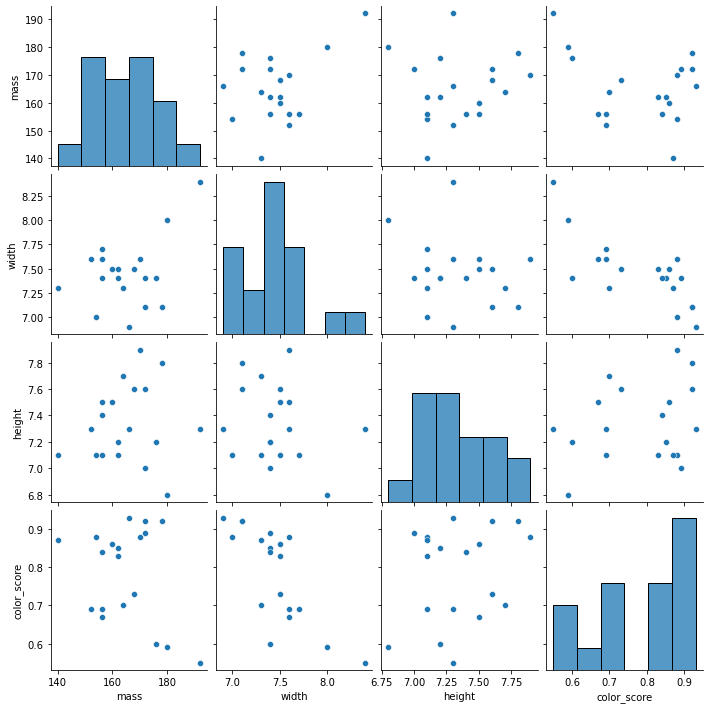

<Figure size 1080x720 with 0 Axes>

In [142]:
pair_plot('apple')

## Mandarin

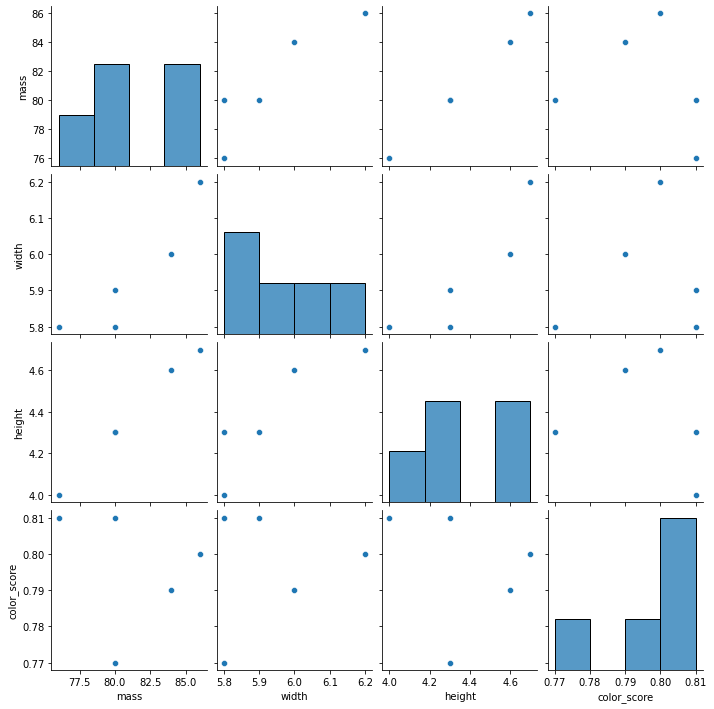

<Figure size 1080x720 with 0 Axes>

In [143]:
pair_plot('mandarin')

## Orange

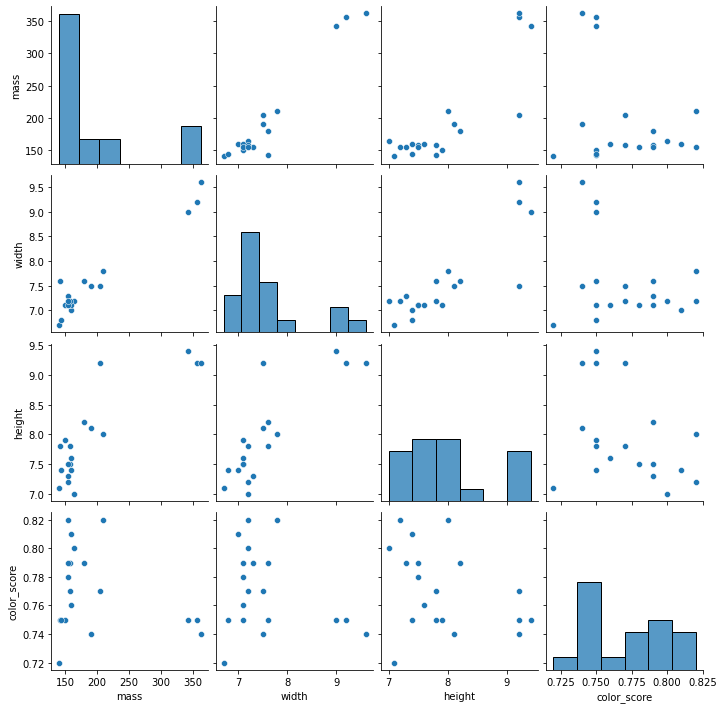

<Figure size 1080x720 with 0 Axes>

In [144]:
pair_plot('orange')

## Lemon

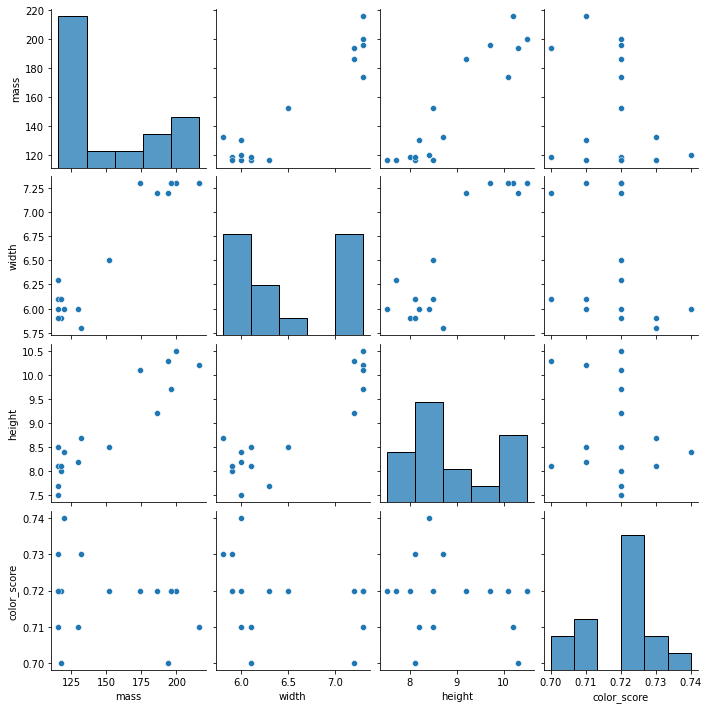

<Figure size 1080x720 with 0 Axes>

In [145]:
pair_plot('lemon')

# Implementing ML models

In [146]:
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


## Preprocessing

In [147]:
X = df.iloc[:, 3:]
y = df['fruit_label']

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [149]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [150]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

## KNN

In [151]:
from collections import Counter
fruit_counts = Counter(y)
# display(fruit_counts)
df_fruit_counts = (pd.DataFrame.from_dict(fruit_counts, orient='index')
                   .reset_index()
                   .rename({'index': 'Label', 0: 'count'}, axis=1))
display(df_fruit_counts)

PCC = ((df_fruit_counts['count'] / len(y)) ** 2).sum()
print(f'PCC = {PCC}')
print(f'1.25*PCC = {PCC*1.25}')

,Label,count
0,1,19
1,2,5
2,3,19
3,4,16


PCC = 0.28813559322033894
1.25*PCC = 0.36016949152542366


In [152]:
from sklearn.neighbors import KNeighborsClassifier

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,101,1):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=seedN)
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    training_accuracy = []
    test_accuracy = []
    neighbors_settings = range(1, len(X_train)) # try n_neighbors from 1 to 50

    for n_neighbors in neighbors_settings:   
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test))   # record generalization accuracy
    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy


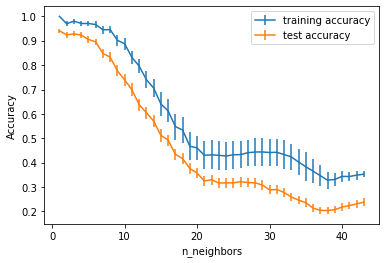

In [153]:
plt.errorbar(neighbors_settings, lahat_training.mean(axis=1),
             yerr=lahat_training.std(axis=1)/2, label="training accuracy")
plt.errorbar(neighbors_settings, lahat_test.mean(axis=1),
             yerr=lahat_test.std(axis=1)/6, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [154]:
optimal_k = lahat_test.mean(axis=1).idxmax()
test_score_KNN = lahat_test.mean(axis=1)[optimal_k]
print(f'optimal k = {optimal_k+1}\navg test_score = {test_score_KNN}')

optimal k = 1
avg test_score = 0.9406666666666665


## Logistic Regression

### L1 Regularization

In [155]:
No_trials = 101

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=seedN)
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    training_accuracy = []
    test_accuracy = []
    
    C = [1e-8, 1e-4, 1e-3,0.1, 5, 10, 15,  20, 100, 300, 1000, 5000, 5300, 5600, 5950, 8000, 8300, 8600, 8950, 10_000, 15_000]

    for alpha_run in C:
        
        lr_l1 = LogisticRegression(C=alpha_run, penalty="l1", solver='liblinear', multi_class='auto').fit(X_train, y_train)
        training_accuracy.append(lr_l1.score(X_train, y_train))
        test_accuracy.append(lr_l1.score(X_test, y_test))
            
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

In [156]:
lahat_test.mean(axis=1)

0     0.307333
1     0.307333
2     0.307333
3     0.284000
4     0.670667
5     0.708667
6     0.713333
7     0.721333
8     0.738000
9     0.745333
10    0.748667
11    0.752667
12    0.752000
13    0.752000
14    0.752000
15    0.752667
16    0.752000
17    0.752000
18    0.751333
19    0.752000
20    0.750667
dtype: float64

Highest Test Set Achieved = 0.752667
Best C Parameter = 5000.000000


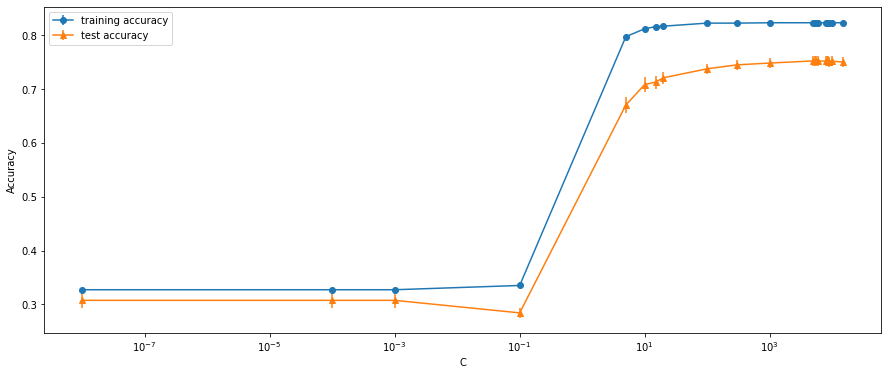

In [157]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
#plt.ylim(.9,1)
plt.legend()
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
lr_l1 = LogisticRegression(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l1", solver='liblinear').fit(X_train, y_train)

li = []
for class_ in lr_l1.classes_:
    max_value = np.max(np.abs(lr_l1.coef_[class_-1]))
    li.append((class_, max_value, lr_l1.classes_[np.argmax(np.abs(lr_l1.coef_[class_-1]))]))
print('Top predictors of each class')
pd.DataFrame(li, columns=['Class', 'value', 'feature'])

Top predictors of each class


,Class,value,feature
0,1,34.644269,2
1,2,44.046781,1
2,3,22.921361,1
3,4,58.214868,2


In [159]:
lr_l1.coef_

array([[-32.89636001,  34.64426941,   0.4856715 ,   6.58801449],
       [-44.04678085,   0.        , -18.69507934,  10.43890856],
       [ 22.92136115,  -6.25818665,  -6.54445556,   1.00138959],
       [  0.        , -58.21486778,  57.37415026, -45.98535518]])

In [160]:
lr_l1.classes_.tolist()

[1, 2, 3, 4]

### L2 Regularization

In [161]:
No_trials = 101

all_training = pd.DataFrame()
all_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=seedN)
    
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    training_accuracy = []
    test_accuracy = []
    
    C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 320, 350, 400, 450, 500, 1000, 5000, 8000]

    for alpha_run in C:
        lr_l2 = LogisticRegression(penalty="l2",C=alpha_run, multi_class='auto').fit(X_train, y_train)
        training_accuracy.append(lr_l2.score(X_train, y_train))
        test_accuracy.append(lr_l2.score(X_test, y_test))
        #print(alpha_run)
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

In [162]:
all_test.mean(axis=1)

0     0.236000
1     0.236667
2     0.238000
3     0.272667
4     0.346000
5     0.436667
6     0.497333
7     0.519333
8     0.552000
9     0.614667
10    0.656000
11    0.696667
12    0.716000
13    0.732667
14    0.796667
15    0.804667
16    0.804667
17    0.804667
18    0.802667
19    0.802667
20    0.803333
21    0.802667
22    0.802667
23    0.803333
dtype: float64

Highest Test Set Achieved = 0.804667
Best C Parameter = 300.000000


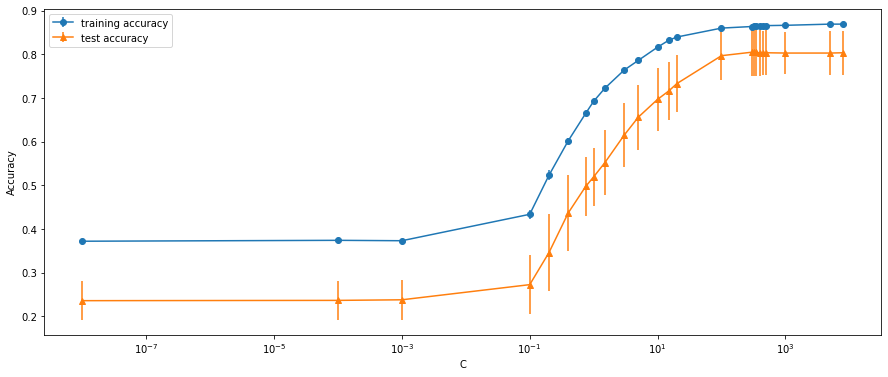

In [163]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, all_training.mean(axis=1),
             yerr=all_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, all_test.mean(axis=1), marker='^',
             yerr=5*all_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
# plt.ylim(.7,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(all_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(all_test.mean(axis=1))])

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr_l2 = LogisticRegression(C=C[np.argmax(all_test.mean(axis=1))]).fit(X_train, y_train)

# print("Top Predictor = %s" %X.columns[np.argmax(lr_l2.coef_.T)])
# print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(lr_l2 .coef_.T))


In [165]:
lr_l2.coef_

## proportion of class(1) * (1.89) + class2*-6.25 ...

array([[ -7.24559516,  18.98667737,  -5.0928975 ,   5.1397794 ],
       [ -5.01838465,  -4.9241176 , -10.18576559,   1.80911127],
       [ 13.03523148,  -1.40541467,  -2.79958364,   1.87400782],
       [ -0.77125167, -12.6571451 ,  18.07824673,  -8.82289849]])

In [166]:
li = []
for class_ in lr_l2.classes_:
    max_value = np.max(np.abs(lr_l2.coef_[class_-1]))
    li.append((class_, max_value, lr_l2.classes_[np.argmax(np.abs(lr_l2.coef_[class_-1]))]))
print('Top predictors of each class')
pd.DataFrame(li, columns=['Class', 'value', 'feature'])

Top predictors of each class


,Class,value,feature
0,1,18.986677,2
1,2,10.185766,3
2,3,13.035231,1
3,4,18.078247,3


In [167]:
X.columns

Index(['mass', 'width', 'height', 'color_score'], dtype='object')

## SVM

### L1 Regularization

In [168]:
No_trials=101

from sklearn.svm import LinearSVC

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.25,
                                                        random_state=seedN)
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
    training_accuracy = []
    test_accuracy = []
    #neighbors_settings = range(1, 100) # try n_neighbors from 1 to 50

    C = [1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 500, 800, 950, 1000, 1150, 1250, 5000, 8000, 10_000]
    for alpha_run in C:

        svm_l1 = LinearSVC(C=alpha_run, penalty="l1", loss='squared_hinge', dual=False).fit(X_train, y_train)
        training_accuracy.append(svm_l1.score(X_train, y_train))
        test_accuracy.append(svm_l1.score(X_test, y_test))

    
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy

Highest Test Set Achieved = 0.734000
Best C Parameter = 1250.000000


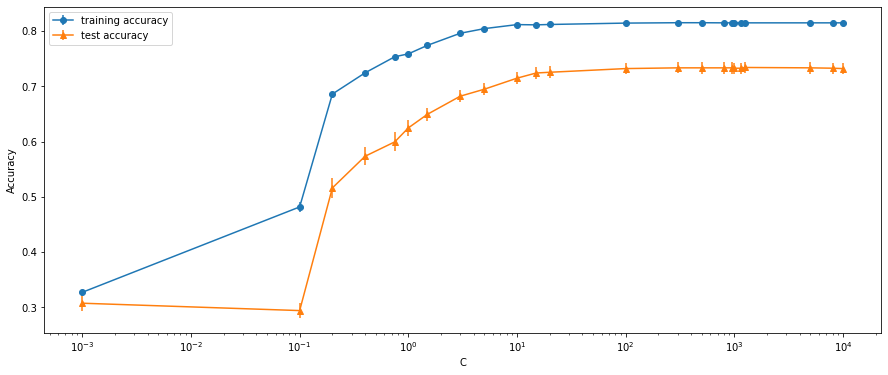

In [169]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
# plt.ylim(.7,1)
plt.legend()

print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



svm_l1 = LinearSVC(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l1", loss='squared_hinge', dual=False).fit(X_train, y_train)

# print("Top Predictor = %s" %cancer.feature_names[np.argmax(svm_l1.coef_.T)])
# print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(svm_l1 .coef_.T))
svm_l1.coef_

array([[-10.28385314,  11.37370928,  -0.08142365,   2.06282244],
       [ -5.06415799,   0.        ,  -2.81628243,   1.26523606],
       [  7.65456025,  -2.2348202 ,  -2.06868793,   0.35681574],
       [  0.13884675, -10.06077518,   9.20709175,  -8.19624972]])

In [171]:
li = []
for class_ in svm_l1.classes_:
    max_value = np.max(np.abs(svm_l1.coef_[class_-1]))
    li.append((class_, max_value, svm_l1.classes_[np.argmax(np.abs(svm_l1.coef_[class_-1]))]))
print('Top predictors of each class')
pd.DataFrame(li, columns=['Class', 'value', 'feature'])

Top predictors of each class


,Class,value,feature
0,1,11.373709,2
1,2,5.064158,1
2,3,7.654560,1
3,4,10.060775,2


### L2 Regularization

In [172]:
No_trials =100

from sklearn.svm import LinearSVC

lahat_training = pd.DataFrame()
lahat_test = pd.DataFrame()
for seedN in range(1,No_trials,1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        random_state=seedN)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    training_accuracy = []
    test_accuracy = []
  
    C = [1e-8, 1e-4, 1e-3,0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 110, 130, 250, 300, 1000, 5000, 8000, 10_000]
    for alpha_run in C:
        svm_l2 = LinearSVC(C=alpha_run, penalty="l2").fit(X_train, y_train)
        training_accuracy.append(svm_l2.score(X_train, y_train))
        test_accuracy.append(svm_l2.score(X_test, y_test))
     
    lahat_training[seedN]=training_accuracy
    lahat_test[seedN] = test_accuracy


In [173]:
display(lahat_test.mean(axis=1))

C[lahat_test.mean(axis=1).idxmax()]

0     0.247811
1     0.248485
2     0.249158
3     0.501684
4     0.554882
5     0.581818
6     0.611448
7     0.622896
8     0.630303
9     0.650505
10    0.663973
11    0.687542
12    0.694276
13    0.698990
14    0.736027
15    0.732660
16    0.745455
17    0.730640
18    0.719192
19    0.674747
20    0.691582
21    0.676768
22    0.676094
dtype: float64

130

Highest Test Set Achieved = 0.745455
Best C Parameter = 130.000000


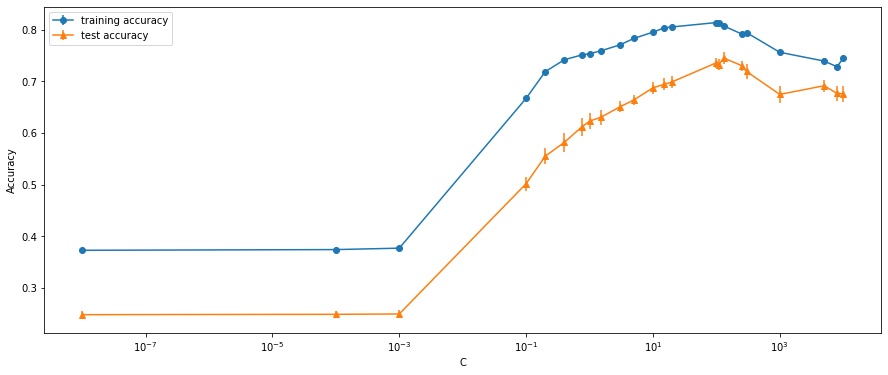

In [174]:
fig = plt.figure(figsize=(15, 6))

plt.xscale('log')
plt.errorbar(C, lahat_training.mean(axis=1),
             yerr=lahat_training.var(axis=1), label="training accuracy", marker='o')
plt.errorbar(C, lahat_test.mean(axis=1), marker='^',
             yerr=lahat_test.var(axis=1), label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
#plt.ylim(.9,1)
plt.legend()
print("Highest Test Set Achieved = %f" % np.amax(lahat_test.mean(axis=1)))
print("Best C Parameter = %f" % C[np.argmax(lahat_test.mean(axis=1))])

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


svm_l2 = LinearSVC(C=C[np.argmax(lahat_test.mean(axis=1))], penalty="l2").fit(X_train, y_train)

# print("Top Predictor = %s" %cancer.feature_names[np.argmax(svm_l2.coef_.T)])
# print("Top Predictor Weight of ML with highest prediction = %f" %np.amax(svm_l2 .coef_.T))
svm_l2.coef_

array([[-9.21251488, 10.19284527, -0.27781922,  1.80566529],
       [-1.77166039, -0.8666896 , -3.87764432,  0.60062939],
       [ 6.7360791 , -1.96136446, -1.81626878,  0.47296862],
       [-1.59685468, -6.42352016,  7.78246172, -5.81002304]])

In [176]:
li = []
for class_ in svm_l2.classes_:
    max_value = np.max(np.abs(svm_l2.coef_[class_-1]))
    li.append((class_, max_value, svm_l2.classes_[np.argmax(np.abs(svm_l2.coef_[class_-1]))]))
print('Top predictors of each class')
pd.DataFrame(li, columns=['Class', 'value', 'feature'])

Top predictors of each class


,Class,value,feature
0,1,10.192845,2
1,2,3.877644,3
2,3,6.736079,1
3,4,7.782462,3


<center>
    <h1>SUMMARY OF RESULTS</h1>
</center>



|Machine Learning Method| Test Accuracy | Best Parameter | Top Predictor Variable
| :---: | :---: | :----: |:---:|
| kNN | 94.01% | N_Neighbor = 1| NA
| Logistic (L1) | 75.27% |C=5,000| [LRL1](#lrl1)
| Logistic (L2) |80.47% | C=300 | [LRL2](#lrl2)
| Linear SVM (L1) | 73.40% | C=1250| [SVL1](#svl1)
| Linear SVM(L2) |  74.55%| C=130 | [SVL2](#svl2)




<center>
<h2><a id='lrl1'>Logistic (L1)</a></h2>
</center>


    
|Class| Top Predictor | 
| :---: | :---: |
| apple   | width
| mandarin | mass 
| orange | mass
| lemon | width
    


<center>
    <h2 id='lrl2'><a id='lrl2'>Logistic (L2)</a></h2>
</center>

    
|Class| Top Predictor | 
| :---: | :---: |
| apple   | width
| mandarin |height 
| orange | mass
| lemon | height

<center>
<h2 id='svl1'><a id='svl1'>SVM (L1)</a></h2>
</center>

    
|Class| Top Predictor | 
| :---: | :---: |
| apple   | width
| mandarin | mass 
| orange | mass
| lemon | width

<center>
<h2 id='svl2'><a id='svl2'>SVM (L2)</a></h2>
</center>

    
|Class| Top Predictor | 
| :---: | :---: |
| apple   | width
| mandarin | height 
| orange | mass
| lemon | height